# Visualisasi Data

Visualisasi data adalah proses mempresentasikan data terstruktur maupun tidak terstruktur melalui grafik untuk mengkomunikasikan informasi secara lebih efisien dan mudah dimengerti. Ada banyak library visualisasi data di Python, seperti; [pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-barplot), [matplotlib](https://matplotlib.org/stable/gallery/index.html), dan [seaborn](https://seaborn.pydata.org/examples/index.html). Dalam pelatihan ini, menggunakan library visualisasi terbaik dan interaktif yang juga dapat diterapkan diberbagai bahasa pemrograman termasuk Python yaitu: [Plotly](https://plotly.com/graphing-libraries/). Pada bagian ini, diasumsikan anda sudah melakukan persiapan data dan impor data sebelum divisualisasikan. Langkah selanjutnya, adalah mengetahui informasi dasar mengenai dataset:

In [1]:
import pandas as pd
data = pd.read_excel('data/all_data.xlsx')   # import data 
data.info()                                  # informasi dasar mengenai dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58058 entries, 0 to 58057
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   PERIODE           58058 non-null  datetime64[ns]
 1   REGION            58058 non-null  object        
 2   BRANCH_ID         58058 non-null  object        
 3   BRANCH_NAME       58058 non-null  object        
 4   SERVICES_CODE     58058 non-null  object        
 5   ZONE_DESTINATION  57702 non-null  object        
 6   JUMLAH_AWB        58058 non-null  int64         
 7   JUMLAH_WEIGHT     58050 non-null  float64       
 8   JUMLAH_CASH       58058 non-null  float64       
 9   JUMLAH_CREDIT     58058 non-null  float64       
 10  JUMLAH_COD        58058 non-null  float64       
 11  JUMLAH_EPAY       58058 non-null  float64       
 12  TOTAL_OMZET       58058 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 5.8+ MB


Berikut ini adalah deskripsi dataset yang sedang digunakan:
    
* PERIODE = Transaksi Bulanan
* REGION = Regional
* BRANCH_ID = Nomor ID Cabang
* BRANCH_NAME = Nama Cabang
* SERVICES_CODE = Code Produk       
* ZONE_DESTINATION = Tujuan Pengiriman 
* JUMLAH_AWB = Jumlah Resi Pengiriman        
* JUMLAH_WEIGHT = Berat Barang yang dikirimkan
* JUMLAH_CASH = Pembayaran Tunai     
* JUMLAH_CREDIT = Pembayaran Kredit
* JUMLAH_COD = Pembayaran di tempat
* JUMLAH_EPAY = Pembayaran Online
* TOTAL_OMZET = Total Omset

## Verifikasi Kelengkapan Data

Dataset terkadang memuat data yang hilang, bisa saja karena tidak dikumpulkan atau tidak pernah ada. Sehingga, untuk melakukan analisa perlu dilakukan pemeriksaan kelengkapan data terlebih dahulu. Berikut ini diperlihatkan cara untuk mengekstrak baris yang berisi setidaknya satu nilai yang hilang:

In [9]:
data[data.isna().any(axis=1)]   # bisa gunakan `isnull()` atau `isna()`

PERIODE            REGION BRANCH_ID    BRANCH_NAME SERVICES_CODE  \
92    2020-01-01        JAWA BARAT    CB0058    CAB.BANDUNG         JTR18   
126   2020-01-01      SERBODETABEK    CB0055     CAB.BEKASI         JTR18   
133   2020-01-01      SERBODETABEK    CB0055     CAB.BEKASI         OKE19   
138   2020-01-01      SERBODETABEK    CB0055     CAB.BEKASI         REG19   
186   2020-01-01      SERBODETABEK    CB0053      CAB.BOGOR         OKE19   
...          ...               ...       ...            ...           ...   
56288 2022-07-01           JAKARTA    CB0001     HO JAKARTA         CTC19   
56296 2022-07-01           JAKARTA    CB0001     HO JAKARTA         JTR18   
56329 2022-07-01           JAKARTA    CB0001     HO JAKARTA         REG19   
57833 2022-07-01      SERBODETABEK    CB0010  CAB.TANGERANG         REG19   
58050 2022-07-01  SULAWESI - PAPUA    CB0035   CAB.MAKASSAR         REG19   

      ZONE_DESTINATION  JUMLAH_AWB  JUMLAH_WEIGHT  JUMLAH_CASH  JUMLAH_CREDIT  \
92                 NaN           1          2.800      16250.0            0.0   
126                NaN           1          3.500      17500.0            0.0   
133                NaN           2          0.700      10000.0            0.0   
138                NaN           7          9.450     157250.0            0.0   
186                NaN           7          3.150      45000.0            0.0   
...                ...         ...            ...          ...            ...   
56288              NaN           2          0.007          0.0            0.0   
56296              NaN           2          4.900          0.0        40000.0   
56329              NaN           4          3.570          0.0        36600.0   
57833              NaN           2          0.007          0.0            0.0   
58050              NaN           6          1.407          0.0        11000.0   

       JUMLAH_COD  JUMLAH_EPAY  TOTAL_OMZET  
92            0.0          0.0      16250.0  
126           0.0          0.0      17500.0  
133           0.0          0.0      10000.0  
138           0.0          0.0     157250.0  
186           0.0          0.0      45000.0  
...           ...          ...          ...  
56288         0.0          0.0          0.0  
56296         0.0          0.0      40000.0  
56329         0.0          0.0      36600.0  
57833         0.0          0.0          0.0  
58050         0.0          0.0      11000.0  

[364 rows x 13 columns]

In [95]:
data.isna().sum()                 # menghitung data yang hilang disetiap kolom

PERIODE               0
REGION                0
BRANCH_ID             0
BRANCH_NAME           0
SERVICES_CODE         0
ZONE_DESTINATION    356
JUMLAH_AWB            0
JUMLAH_WEIGHT         8
JUMLAH_CASH           0
JUMLAH_CREDIT         0
JUMLAH_COD            0
JUMLAH_EPAY           0
TOTAL_OMZET           0
dtype: int64

## Perbaharui Data

Ada banyak langkah yang dapat dilakukan untuk mengisi data yang hilang denga Python, berikut ini adalah cara yang paling sering digunakan:

In [54]:
edh1=data.fillna({"ZONE_DESTINATION":'A'})     # ganti data hilang pada spesifik kolom
edh2=data.fillna(method="ffill")               # ganti data hilang dgn baris sebelumnya
edh3=data.fillna(method="bfill")               # ganti data hilang dgn baris setelahya
edh4=data.fillna(0)                            # ganti data hilang dng 0
edh5=data.dropna()                             # hapus data hilang

Selain cara diatas, berikut ini juga dapat digunakan untuk mengisi maupun memperbaharui data yang hilang:

In [23]:
edh6=data.fillna(data.mode().iloc[0])          # data data hilang dengan median() dan mean()
edh6.isnull().sum()                            # menghitung data yang hilang disetiap kolom



PERIODE             0
REGION              0
BRANCH_ID           0
BRANCH_NAME         0
SERVICES_CODE       0
ZONE_DESTINATION    0
JUMLAH_AWB          0
JUMLAH_WEIGHT       0
JUMLAH_CASH         0
JUMLAH_CREDIT       0
JUMLAH_COD          0
JUMLAH_EPAY         0
TOTAL_OMZET         0
dtype: int64

### Quiz 1 

Apa yang terjadi jika anda mengisi data yang hilang tersebut dengan dengan median() dan mean()? jelaskan!


### Quiz 2 
Bagaimana cara untuk memastikan apakah masih ada data yang hilang (data tidak lengkap) di `edh6` ?

## Statistik Dasar

Selanjutnya, mengetahui informasi statistik dasar mengenai data tersebut. Dapat dilakukan dengan script berikut:

In [60]:
data.describe()                              # informasi statistik dasar (data numerik saja)

JUMLAH_AWB  JUMLAH_WEIGHT   JUMLAH_CASH  JUMLAH_CREDIT    JUMLAH_COD  \
count  5.805800e+04   5.805000e+04  5.805800e+04   5.805800e+04  5.805800e+04   
mean   4.998531e+03   9.032599e+03  4.322020e+07   6.537024e+07  8.661685e+04   
std    4.628010e+04   6.281230e+04  2.393542e+08   7.717261e+08  8.284621e+05   
min    1.000000e+00  -3.089790e+02 -6.750000e+05  -7.500000e+04  0.000000e+00   
25%    5.000000e+00   1.190000e+01  0.000000e+00   0.000000e+00  0.000000e+00   
50%    5.600000e+01   1.563645e+02  6.837500e+05   2.854710e+05  0.000000e+00   
75%    8.240000e+02   2.040400e+03  1.369183e+07   6.444271e+06  0.000000e+00   
max    2.334538e+06   2.726263e+06  1.253993e+10   5.242170e+10  7.267550e+07   

        JUMLAH_EPAY   TOTAL_OMZET  
count  5.805800e+04  5.805800e+04  
mean   7.460462e+05  1.094231e+08  
std    5.057219e+06  9.328349e+08  
min    0.000000e+00 -6.750000e+05  
25%    0.000000e+00  1.402500e+05  
50%    0.000000e+00  2.003075e+06  
75%    1.020000e+05  2.605744e+07  
max    2.788892e+08  5.511628e+10

### Quiz 3

Berdasarkan deskripsi statistik dasar di atas, apakah anda dapat menemukan informasi yang ganjil (janggal)? Jika iya, berikan penjelasan anda?

Hasil statistik dasar diatas, hanya memperlihatkan data numerik saja. Lalu bagaimana dengan data kategori yang ada pada dataset tersebut? Gunakan script sebagai berikut:

In [ ]:
# untuk memilih data kategori digunakan include='object' dan sebaliknya gunakan include='number'
kategori = data.select_dtypes(include='object')
kategori.describe().transpose()

count unique         top   freq
REGION            58058      8    SUMATERA  12162
BRANCH_ID         58058     62      CB0001   1674
BRANCH_NAME       58058     62  HO JAKARTA   1674
SERVICES_CODE     58058    141       REG19   7658
ZONE_DESTINATION  57702      4           A  22426

### Quiz 4

Perhatikan deskriptif statistik data kategorikal diatas, apakah informasi penting yang anda di temukan? 

## Tabel Pivot

Saat melakukan analisis dengan menggunakan fungsi `describe()`seperti yang kita lakukan diatas, terkadang tidak menjawab informasi yang kita inginkan. Karena semua deskripsi tersebut diperhitungkan berdasarkan kolom dari masing-masing variabel pada dataset. Olehkarena itu, jika anda ingin mengetahui deskriptif statistik berdasarkan indeks tertentu makan anda perlu menggunakan Tabel Pivot. Analisis statistik deskriptif tersebut akan diperlihatkan dengan fungsi agregasi `aggfunc` yang ada di Python, yaitu:

* `sum` : yang digunakan untuk pejumlahan nilai pada indeks variabel yang sama.
* `mean` : ~ nilai rata-rata ~
* `min` :  ~ nilai minumum ~
* `max` :  ~ nilai maksimum ~
* `count` : frekuensi


Untuk mengetahui jumlah total pengiriman dan total omset yang diperoleh JNE berdasarkan regionalnya, dapat diperlihatkan dengan script berikut:

In [3]:
# Tabel Pivot untuk menghitung jumlah omzet berdasarkan Region
import numpy as np

df=pd.pivot_table(data,index=['REGION'], values=['TOTAL_OMZET','JUMLAH_WEIGHT'], aggfunc='sum')

# Komfersi indeks menjadi Kolom
df.reset_index(inplace=True)

# Urutkan data dari yang besar ke kecil
df=df.sort_values(['TOTAL_OMZET','JUMLAH_WEIGHT'],ascending=True)

print(df)

             REGION  JUMLAH_WEIGHT   TOTAL_OMZET
6  SULAWESI - PAPUA   4.372067e+06  1.002611e+11
4        KALIMANTAN   5.974869e+06  1.133644e+11
7          SUMATERA   2.612388e+07  4.476565e+11
2       JAWA TENGAH   4.023259e+07  5.125633e+11
3             JTBNN   5.923732e+07  6.850194e+11
1        JAWA BARAT   7.075496e+07  8.552371e+11
5      SERBODETABEK   1.261771e+08  1.224991e+12
0           JAKARTA   1.914696e+08  2.413794e+12


### Quiz 5 

Buatlah script menggunakan Python untuk menyimpan data dari hasil tabel pivot di atas!

Hasil dari Tabel Pivot diatas dapat diperlihatkan secara visual, perhatikan tabel berikut:

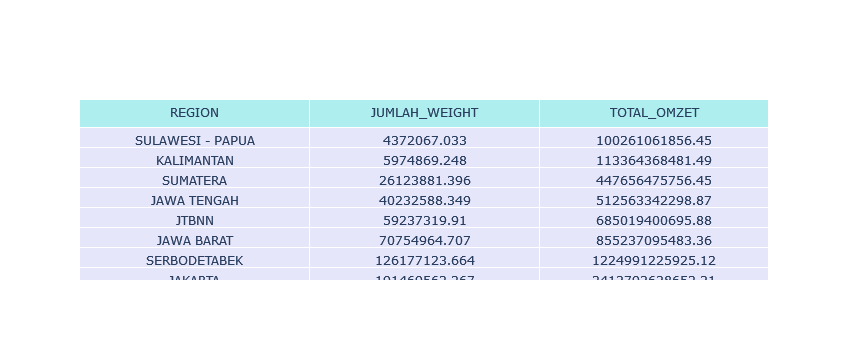

In [7]:
# impor library yg dibutuhkan untuk visualisasi
import plotly.graph_objects as go

# Menampilkan Hasil Tabel Pivot
fig = go.Figure(data = [go.Table(
                header = dict(values = list(df.columns),
                fill_color = 'paleturquoise',
                align = 'center'),
               cells = dict(values = df.transpose().values.tolist(),
               fill_color = 'lavender',
               align = 'center'))])

fig.show()

### Quiz 6

Andaikan Anda sebagai tim Audit melakukan ananlisa terhadap Total  pengiriman dan Total Omset yang diperoleh JNE berdasarkan Produknya. Dengan menggukanan tabel pivot dan visual seperti contoh diatas, apa yang anda temukan? 

**Catatan:** Tabel Pivot dan visualisasi tabel diatas memang sangat membantu untuk menganalisis data. Tetapi dalam banyak kondisi, terdapat berbagai jenis visual (grafik) lainnya yang lebih efektif dan lebih interaktif untuk menjelaskan suatu informasi yang kita butuhkan. 

## Pie-Chart

Diagram lingkaran (Pie-Chart) adalah jenis grafik yang menyajikan sebuah nilai atau data dalam bentuk lingkaran. Diagram lingkaran memudahkan kita untuk mengetahui perbandingan suatu data terhadap keseluruhan data. Untuk membandingkan data satu dengan yang lainnya, maka sebuah lingkaran akan dibagi menjadi beberapa ruas lingkaran. 

Pada umunya, penyajian data pada diagram lingkaran disajikan dalam bentuk derajat (°) dan persen (%). Jika data yang disajikan dalam bentuk derajat, maka ukuran satu lingkaran penuh besarnya adalah 360°. Sedangkan jika suatu data disajikan dalam persen, maka satu lingkaran penuh nilainya adalah 100%. Rumus yang digunakan adalah sebagai berikut:

* Nilai yang ditanyakan (°) = (Besar sudut / 360°) x Total data
* Nilai yang ditanyakan (%) = (Nilai persen yang ditanyakan / 100%) x Total nilai

Berikut ini deperlihatkan grafik lingkaran untuk memperlihatkan Total Omset yang diperoleh JNE berdasarkan regionalnya.

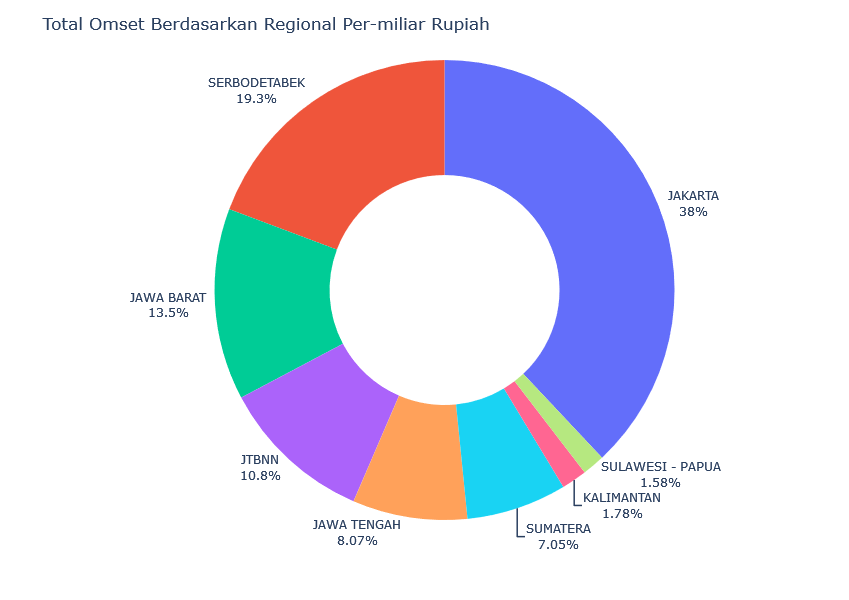

In [27]:
import plotly.express as px

# Tabel Pivot untuk menghitung jumlah omzet berdasarkan Region
df=pd.pivot_table(data,index=['REGION'], values=['TOTAL_OMZET'], aggfunc='sum')

# Komfersi indeks menjadi Kolom
df.reset_index(inplace=True)

# Konversi Total omset menjadi per-miliar 
df["TOTAL_OMZET"] = (df['TOTAL_OMZET']/1000000000)

# membuat grafik lingkaran (pie-chart)
fig = px.pie(df, values='TOTAL_OMZET', names='REGION', hole=0.5, 
             labels={'TOTAL_OMZET':'Total Omset','REGION':'Regional'})

# Pengaturan detail grafik
fig.update_layout(showlegend=False,
                  autosize=False,
                  width=800,
                  height=600,
                  title="Total Omset Berdasarkan Regional Per-miliar Rupiah");

fig.update_traces(textposition='outside', textinfo='percent+label');

fig.show()


Grafik tersebut diatas juga dapat dilengkapi dengan informasi lain, seperti halnya varibel jumlah total resi pengiriman atau  Airway Bill (AWB). Berikut ini script yang digunakan dalam Python:

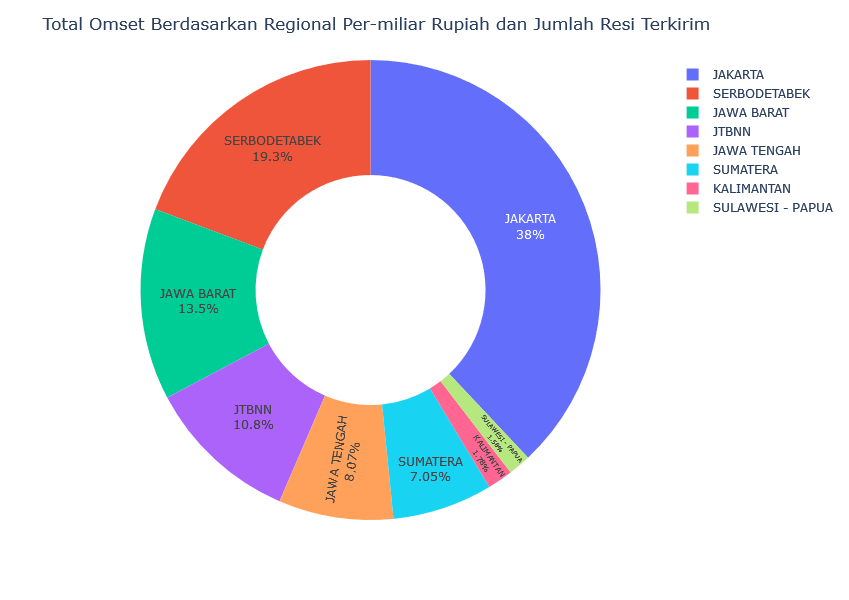

In [26]:
import plotly.express as px

# Tabel Pivot untuk menghitung jumlah omzet berdasarkan Region
df=pd.pivot_table(data,index=['REGION'], values=['TOTAL_OMZET','JUMLAH_AWB'], aggfunc='sum')

# Komfersi indeks menjadi Kolom
df.reset_index(inplace=True)

# Konversi Total omset menjadi per-miliar 
df["TOTAL_OMZET"] = (df['TOTAL_OMZET']/1000000000)

# membuat grafik lingkaran (pie-chart)
fig = px.pie(df, values='TOTAL_OMZET', names='REGION', hole=0.5,
             hover_data=['JUMLAH_AWB'], 
             labels={'TOTAL_OMZET':'Total Omset','REGION':'Regional', 'JUMLAH_AWB':'Jumlah Resi (KG)'})

# Pengaturan detail grafik
fig.update_layout(showlegend=True,
                  autosize=False,
                  width=800,
                  height=600,
                  title="Total Omset Berdasarkan Regional Per-miliar Rupiah dan Jumlah Resi Terkirim");

fig.update_traces(textposition='inside', textinfo='percent+label');

fig.show()


### Quiz 7
Setelah memperlajari visualisasi Pie-Chart diatas, bagamana jika anda sebagai tim audit ingin mengetahui total (persentase) resi pengiriman barang berdasarkan regionalnya?

### Quiz 7a
Buatkan Visualisasi Pie-Chart untuk mengetahui total (persentase) Pembayaran COD berdasarkan Produknya serta menambahkan informasi Pembayaran Cash dan EPay juga dalam grafiknya.

## Bar-Chart

Bar chart (Diagram batang) merupakan salah satu bentuk grafik yang digunakan untuk membandingkan data antar variabel dan melihat frekuensi atau besaran dari variabel tersebut. Berikut ini diperlihatkan contoh grafik untuk memperlihatkan **total pendapatan (omset) berdasarkan regional pelayanan JNE**.

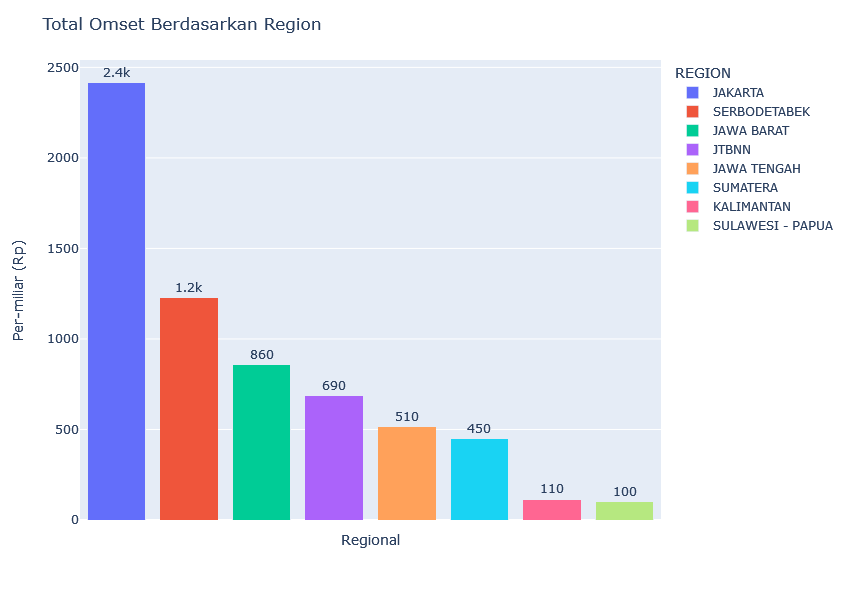

In [48]:
# Tabel Pivot untuk menghitung jumlah omzet berdasarkan Region
df=pd.pivot_table(data,index=['REGION'], values='TOTAL_OMZET', aggfunc='sum')

# Komfersi indeks menjadi Kolom
df.reset_index(inplace=True)

# Urutkan data dari yang besar ke kecil
df=df.sort_values("TOTAL_OMZET",ascending=False)

# Konversi Total omset menjadi per-miliar 
df["TOTAL_OMZET"] = (df['TOTAL_OMZET']/1000000000)

# membuat grafik batang (bar-chart)
fig = px.bar(df, x='REGION', y='TOTAL_OMZET',color='REGION', text_auto='.2s')

# Pengaturan detail grafik
fig.update_layout(barmode='stack',
                  autosize=False,
                  width=800,
                  height=600,
                  showlegend=True,
                  title="Total Omset Berdasarkan Region",
                  xaxis_title="Regional",
                  yaxis_title="Per-miliar (Rp)");
# Pengaturan rotasi axis x (+-360 derajat)
fig.update_xaxes(tickangle=-90);

# Menghapus label di axis y
fig.update_xaxes(showticklabels=False);

# Pengaturan posisi, ukuran, dan rotasi teks
fig.update_traces(textfont_size=12, textangle=0, textposition="outside");
fig.show()


### Quiz 8

Kalau seandainya anda ingin mengatur ukuran grafik Bar-Chart diatas, bagaimana caranya?

Dengan konsep yang sama, berikut ini diperlihatkan contoh grafik untuk memperlihatkan **total pendapatan (omset) berdasarkan produk pelayanan JNE**.

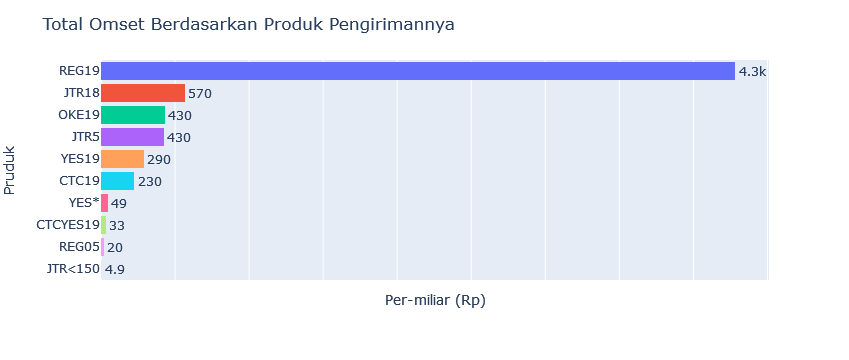

In [27]:
# Tabel Pivot untuk menghitung jumlah omzet berdasarkan Region
df=pd.pivot_table(data,index=['SERVICES_CODE'], values='TOTAL_OMZET', aggfunc='sum')

# Komfersi indeks menjadi Kolom
df.reset_index(inplace=True)

# Urutkan data dari yang besar ke kecil
df=df.sort_values("TOTAL_OMZET",ascending=False).head(10)

# Konversi Total omset menjadi per-miliar 
df["TOTAL_OMZET"] = (df['TOTAL_OMZET']/1000000000)

# impor library yg dibutuhkan untuk visualisasi
import plotly.express as px

# membuat grafik batang (bar-chart)
fig = px.bar(df, y='SERVICES_CODE', x='TOTAL_OMZET',color='SERVICES_CODE', text_auto='.2s')

# Pengaturan detail grafik
fig.update_layout(barmode='stack',
                  showlegend=False,
                  title="Total Omset Berdasarkan Produk Pengirimannya",
                  xaxis_title="Per-miliar (Rp)",
                  yaxis_title="Pruduk")

# Pengaturan rotasi axis x (+-360 derajat)
fig.update_xaxes(tickangle=0, showticklabels=False)

# Pengaturan posisi, ukuran, dan rotasi teks
fig.update_traces(textfont_size=12, textangle=0, textposition="outside")

fig.show()

## Box-plot 

Penyajian grafik lainnya yang bisa merangkum informasi lebih detail mengenai distribusi nilai-nilai data pengamatan adalah Box and Whisker Plots atau lebih sering disebut dengan BoxPlot atau lebih sering dikenal sebagai chart candle stick di analisa pasar saham. Lihat contoh dibawah ini untuk dapat membaca box plot

<center>
<img src="https://github.com/sainzdata/Py_JNE/blob/main/images/box-plot.png?raw=true" width=470" height="350">
</center>


Berikut ini diperlihatkan contoh analisis total omset berdasarkan asal dan tujuan pengiriman barang menggunakan Boxplot.

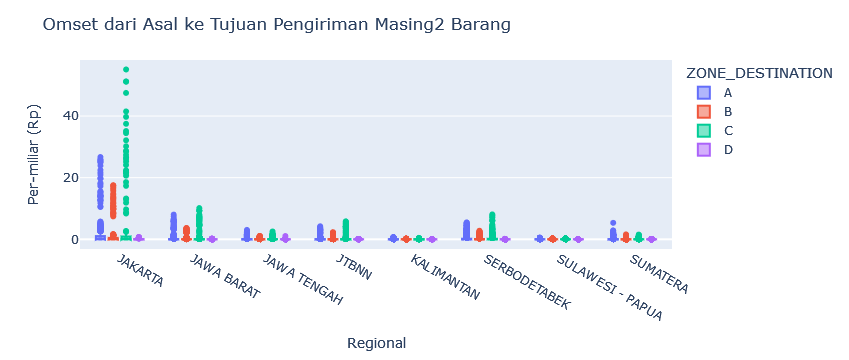

In [52]:
import plotly.express as px
import pandas as pd
import numpy as np

# Tabel Pivot untuk menghitung jumlah omzet berdasarkan Region
df=pd.pivot_table(data,
                  index=['PERIODE',
                         'REGION', 
                         'BRANCH_ID',
                         'BRANCH_NAME',
                         'SERVICES_CODE',
                         'ZONE_DESTINATION'], 
                  values=['TOTAL_OMZET'], aggfunc='sum')

# Komfersi indeks menjadi Kolom
df.reset_index(inplace=True)

# Konversi Total omset menjadi per-miliar 
df["TOTAL_OMZET"] = (df['TOTAL_OMZET']/1000000000)

# Grafik Box-plot
fig = px.box(df, x="REGION", 
             y="TOTAL_OMZET", 
             color="ZONE_DESTINATION", 
             notched=True     # used notched shape
            )

# Pengaturan detail grafik
fig.update_layout(barmode='stack',
                  showlegend=True,
                  title="Omset dari Asal ke Tujuan Pengiriman Masing2 Barang",
                  xaxis_title="Regional",
                  yaxis_title="Per-miliar (Rp)")

# Menghapus label di axis x
fig.update_xaxes(showticklabels=True)

fig.show()

## Scatter Plot

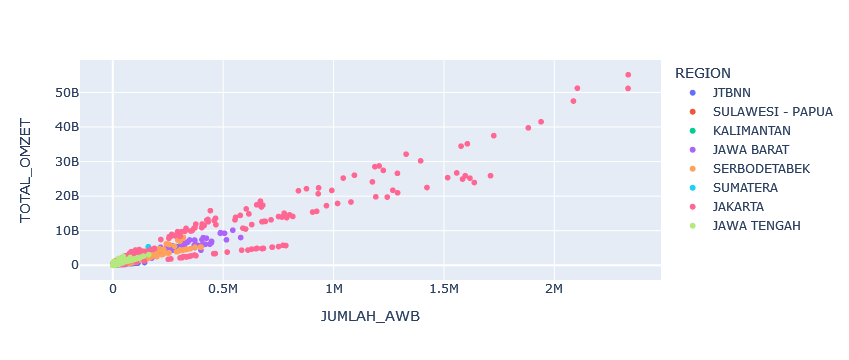

In [80]:
import plotly.express as px

fig = px.scatter(data, x="JUMLAH_AWB", y="TOTAL_OMZET", color="REGION")
fig.show()

## Grafik Garis

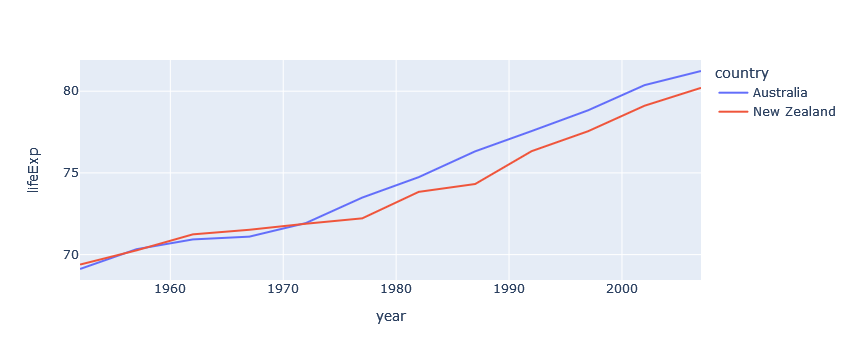

In [73]:
import plotly.express as px

df = px.data.gapminder().query("continent=='Oceania'")
fig = px.line(df, x="year", y="lifeExp", color='country')
fig.show()